In [1189]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [1190]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [1191]:
leadscore = pd.read_csv("C:\\Users\\prane\\Downloads\\Lead Scoring Assignment\\Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1192]:
leadscore.shape

(9240, 37)

There are 9240 rows & 37 columns in dataset

In [1194]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1195]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

Many categorical variables contain the value 'Select,' likely because the customer did not choose an option. Since 'Select' is equivalent to NULL, we can replace these values with nulls.

In [1198]:
leadscore = leadscore.replace('Select',np.nan)

In [1199]:
leadscore.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1200]:
# Finding null % across columns

round(leadscore.isnull().sum()/len(leadscore.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Here we can drop missing values > 40% 

In [1202]:
leadscore = leadscore.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                        'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                        'Asymmetrique Profile Score'])

In [1203]:
round(leadscore.isnull().sum()/len(leadscore.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### Specialization

37 % of missing values in the column

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

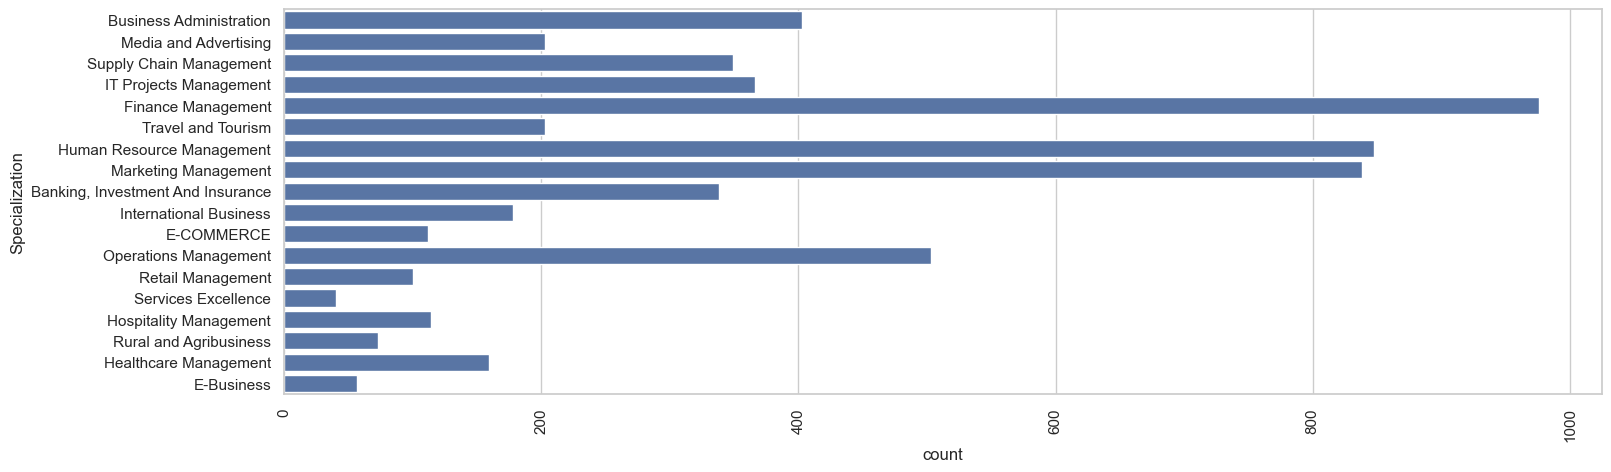

In [1205]:
plt.figure(figsize=(17,5))
sns.countplot(leadscore['Specialization'])
plt.xticks(rotation=90)

The Specialization column has 37% missing values. This could be because the lead is a student, has no specialization, or their specialization isn't listed in the options. To handle this, we can create a new category called 'Others.'

In [1207]:
#creating others for separate category

leadscore['Specialization'] = leadscore['Specialization'].replace(np.nan, 'Others')

### Tags

36% of missing values

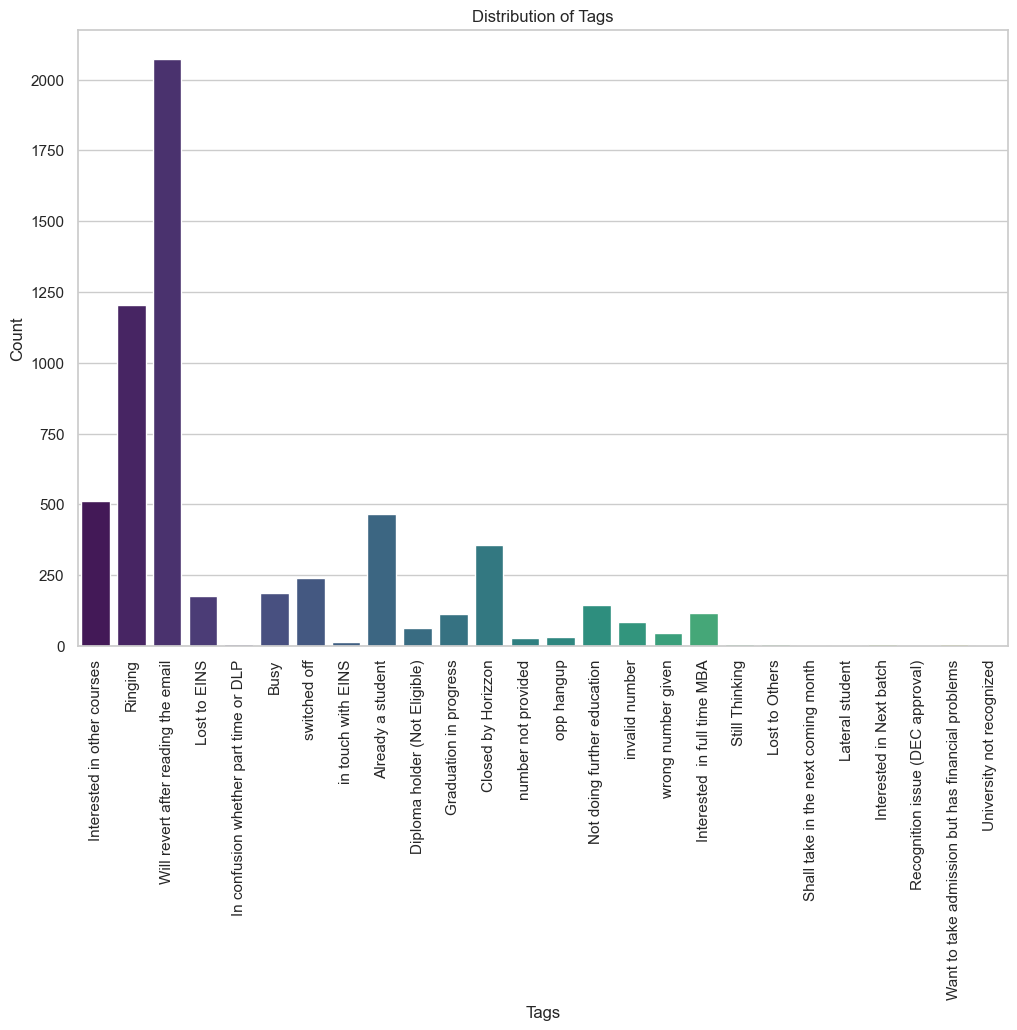

In [1209]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjusted figure size

# Create a count plot with different colors
sns.countplot(data=leadscore, x='Tags', palette="viridis")

plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Tags")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.title("Distribution of Tags")  # Chart title

plt.show()  # Display the plot


Since the majority of values are 'Will revert after reading the email,' we can fill the missing values with this value.

In [1211]:
#Imputing missing data
leadscore['Tags'] = leadscore['Tags'].replace(np.nan,'Will revert after reading the email')

#### What matters most to you in chooisng a course

have 29% missing values

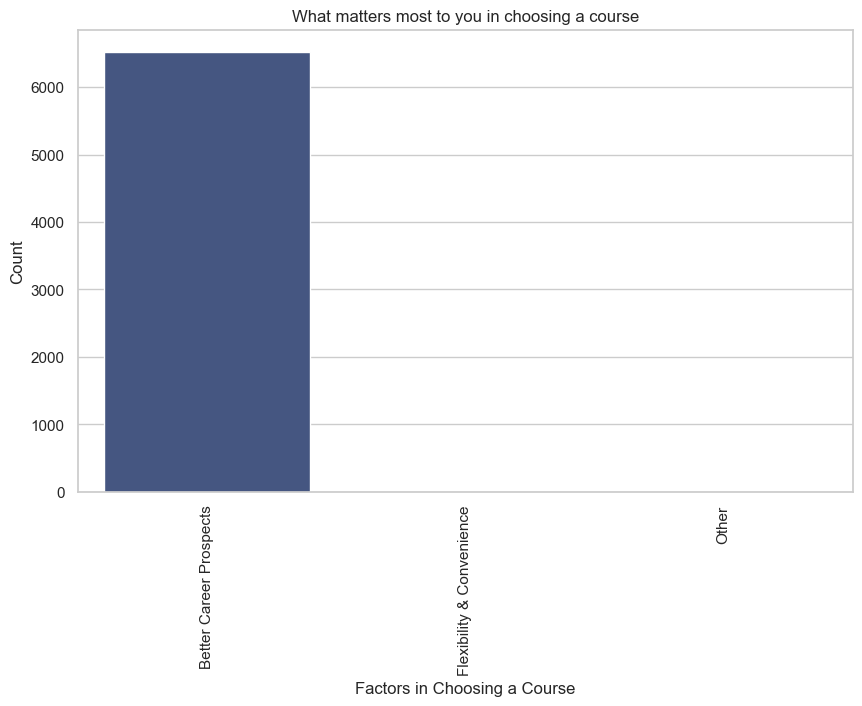

In [1213]:
plt.figure(figsize=(10, 6))  # Adjusting figure size

# Creating the count plot with different colors
sns.countplot(data=leadscore, x='What matters most to you in choosing a course', palette="viridis")

plt.xticks(rotation=90)  # Rotating x-axis labels for readability
plt.xlabel("Factors in Choosing a Course")  # Clear x-axis label
plt.ylabel("Count")  # Clear y-axis label
plt.title("What matters most to you in choosing a course")

plt.show()

In [1214]:
# Finding percentage of different categories

round(leadscore['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

This column is highly skewed, so we can remove it.

In [1216]:
leadscore = leadscore.drop('What matters most to you in choosing a course', axis=1)

#### what is current ocupation

has 29% missing values

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

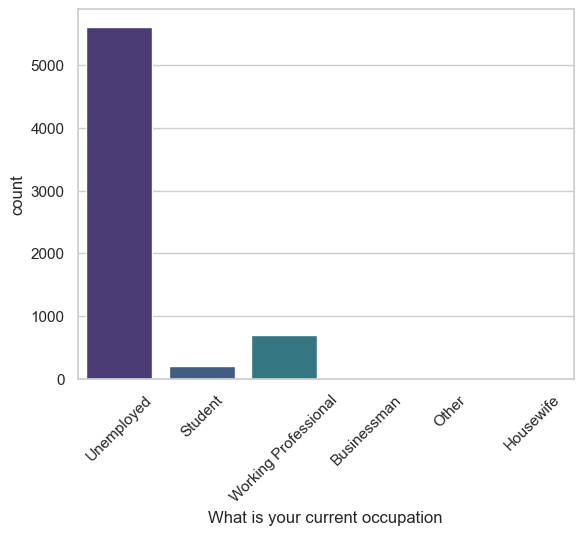

In [1218]:
sns.countplot(data=leadscore, x='What is your current occupation', palette="viridis")
plt.xticks(rotation=45)

In [1219]:
# Finding % of different categories

round(leadscore['What is your current occupation'].value_counts(normalize=True),2)*100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

Since most values are 'Unemployed,' we can fill the missing values with this value.

In [1221]:
#imputing missing values 

leadscore['What is your current occupation'] = leadscore['What is your current occupation'].replace(np.nan,'Unemployed')

##### country

have 27% missing values

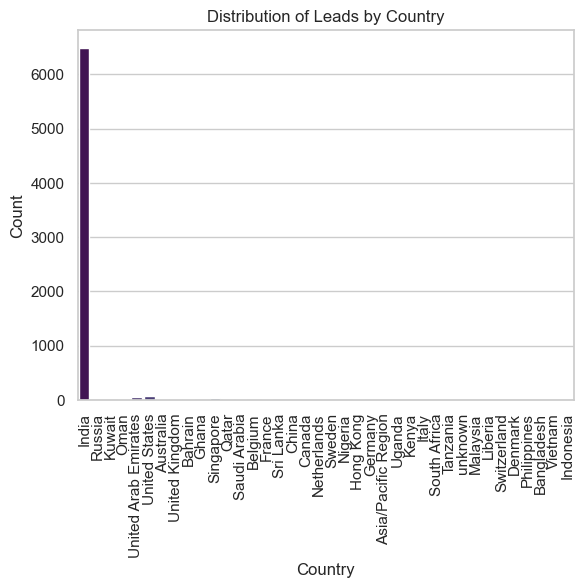

In [1223]:
sns.countplot(data=leadscore, x='Country', palette="viridis")

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Country")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Leads by Country")  # Meaningful title

plt.show()

This column is highly skewed, but it holds important information regarding the lead. Since most values are 'India,' we can fill the missing values with this value.









In [1225]:
# Imputing missing values in country

leadscore['Country'] = leadscore['Country'].replace(np.nan,'India')

##### City

have 40% missing values

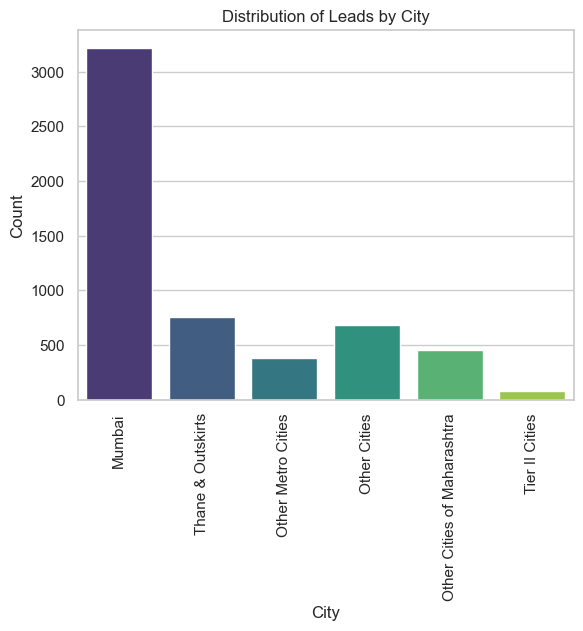

In [1227]:
sns.countplot(data=leadscore, x='City', palette="viridis")

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("City")  # X-axis label
plt.ylabel("Count")  # Y-axis label
plt.title("Distribution of Leads by City")  # Meaningful title

plt.show()

In [1228]:
# fidning % of diff categories

round(leadscore['City'].value_counts(normalize=True),2)*100

City
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

Mumbai has most values. can impute missing values in column 

In [1230]:
#imputing missing values in city

leadscore['City'] = leadscore['City'].replace(np.nan,'Mumbai')

In [1231]:
round(leadscore.isnull().sum()/len(leadscore.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

REst have missing values 2 % can drop these rows

In [1233]:
#Dropping null values 
leadscore.dropna(inplace=True)

In [1234]:
#finding null % 

round(leadscore.isnull().sum()/len(leadscore.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

we don't have missing values in dataset 

In [1236]:
# % of rows retained

(len(leadscore.index)/9240)*100

98.2034632034632

After cleaning the data, we retained 98% of the rows.

### Exploratory Data Analysis (EDA)

In [1239]:
leadscore[leadscore.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicate records in dataset

#### Univariate Analysis & Bivariate Analysis

#### Converted

The target variable, Converted, indicates whether a lead was successfully converted (1) or not (0).

In [1243]:
Converted = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
Converted

37.85541106458012

Lead Conversion rate is 38%

Lead Origin

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

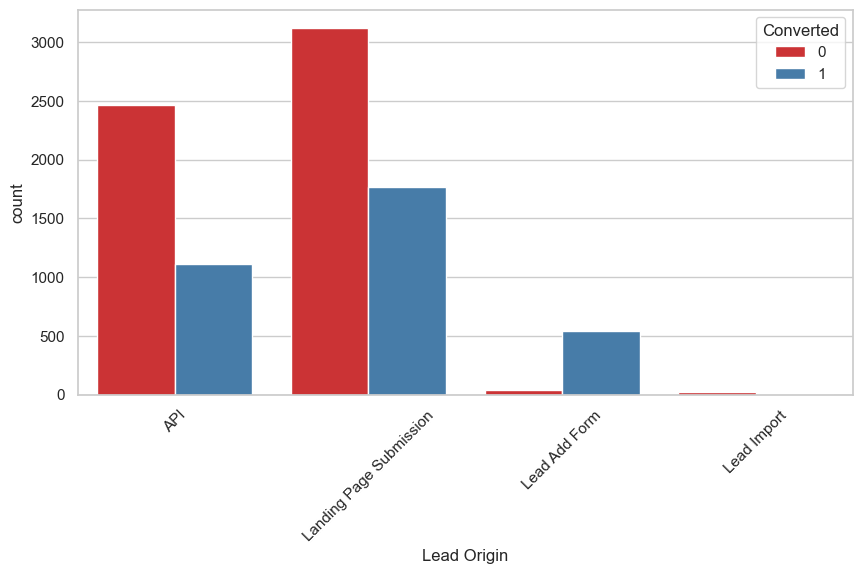

In [1246]:
plt.figure(figsize=(10,5))
sns.countplot(x="Lead Origin",hue="Converted",data = leadscore,palette='Set1')
plt.xticks(rotation=45)

#### Inference:

* API and Landing Page Submission have a 30-35% Conversion rate, but no of leads from these source is significant.
* Lead Add Form has 90%+ conversion rate, but no of leads generated from it is relatively low
* Lead Import occurs rarely and has a very low count 
* To improve overall lead conversion rate, we should focus on incresing conversion from API and LAnding Submission while 
  generating more leads through the LEad Add Form.

#### Lead Source

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

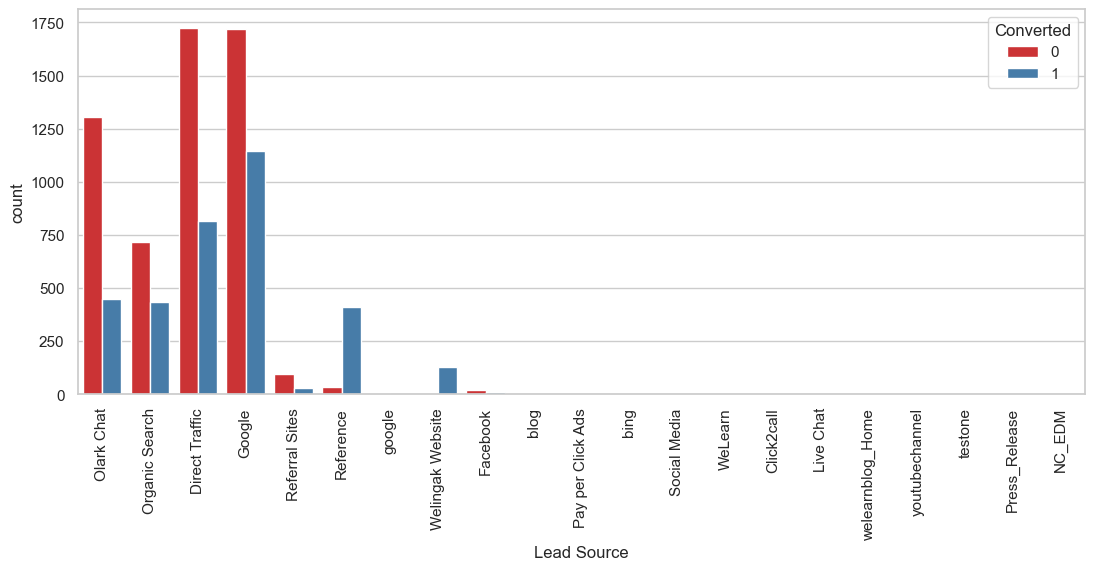

In [1249]:
plt.figure(figsize = (13,5))
sns.countplot(x="Lead Source", hue ="Converted", data = leadscore, palette='Set1')
plt.xticks(rotation=90)

In [1250]:
# replace google with Google

leadscore['Lead Source'] = leadscore['Lead Source'].replace(['google'],'Google')

In [1251]:
# creating new categories others for some of lead sources which don't have values

leadscore['Lead Source'] = leadscore['Lead Source'].replace(['Click2call','Live Chat','NC_EDM',
                                                             'Pay per Click Ads','Press_Release',
                                                             'Social Media','WeLearn','bing','blog',
                                                             'testone','welearnblog_Home','youtubechannel'],'Others')
                                                             

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

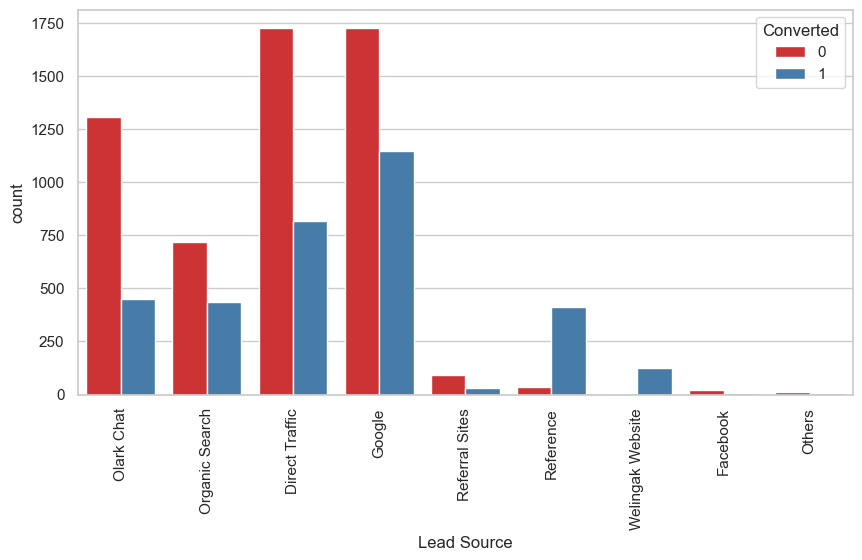

In [1252]:
# Visualizing again

plt.figure(figsize=(10,5))
sns.countplot(x="Lead Source", hue="Converted", data = leadscore, palette='Set1')
plt.xticks(rotation =90)

#### Inference

* Google and Direct TRaffic generate the highest number of leads
* Reference leads and leads from the Welingak website have a high conversion rate
* to improve the overall conversion rate, efforts should focus on boosting conversions 
from Olark chat,organic Search, Direct TRaffic and Google leads while also generating more leads from Reference and welingak website


#### Do Not Email

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

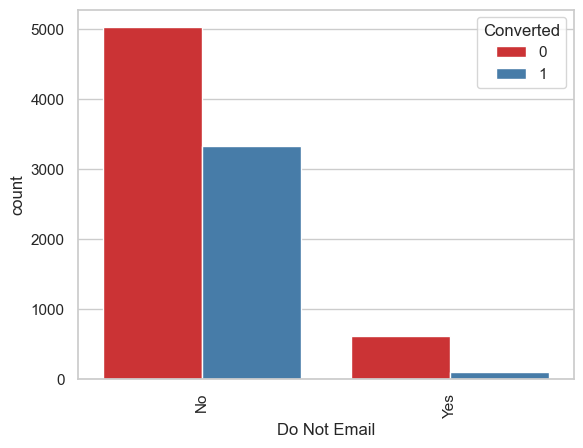

In [1255]:
sns.countplot(x="Do Not Email", hue = "Converted", data = leadscore, palette='Set1')
plt.xticks(rotation=90)

Inference:
Most entries are marked as 'No,' making it difficult to derive any meaningful insights from this parameter.

#### Do not Call

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

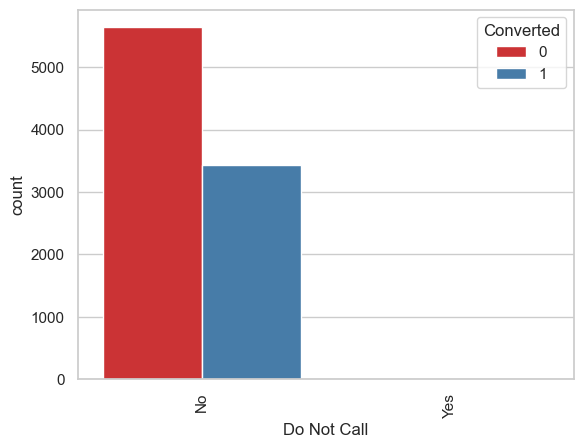

In [1258]:
sns.countplot(x="Do Not Call", hue = "Converted", data = leadscore, palette='Set1')
plt.xticks(rotation=90)

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

#### Total Visits

In [1261]:
leadscore['TotalVisits'].describe(percentiles=[0.05,.25,.75,.90,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: ylabel='TotalVisits'>

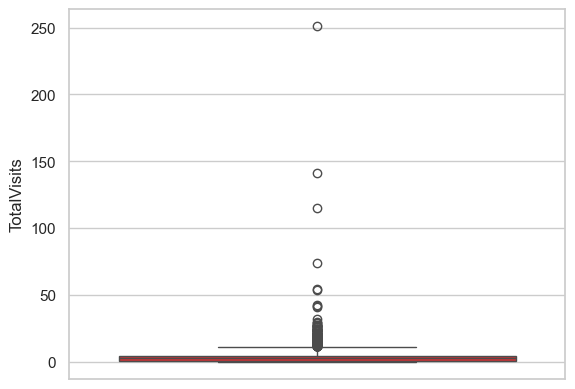

In [1262]:
sns.boxplot(leadscore['TotalVisits'],orient='vert',palette='Set1')

There are several outliers in the data. For analysis, we will cap them at the 95th percentile.

In [1264]:
percentiles = leadscore['TotalVisits'].quantile([0.05,0.95]).values
leadscore['TotalVisits'][leadscore['TotalVisits'] <= percentiles[0]] = percentiles[0]
leadscore['TotalVisits'][leadscore['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

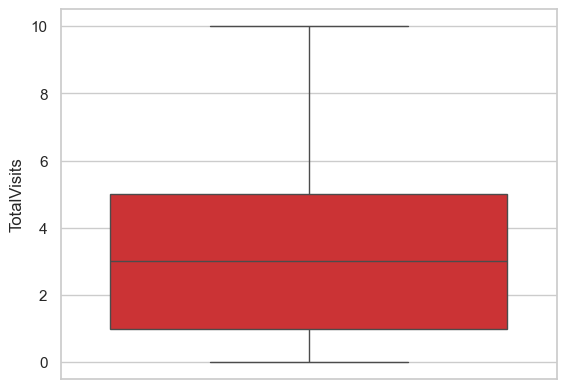

In [1265]:
# Visualizing 
sns.boxplot(leadscore['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

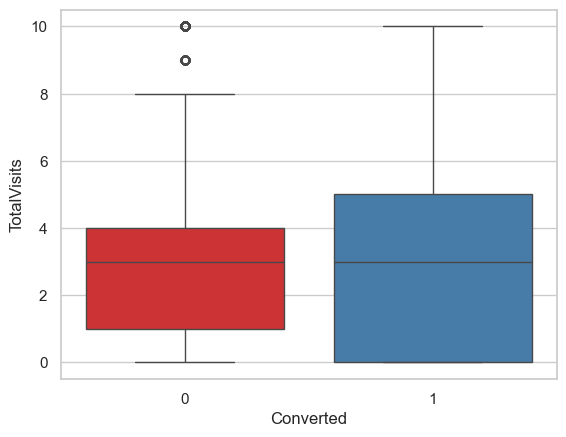

In [1266]:
sns.boxplot(y='TotalVisits', x='Converted', data = leadscore,palette='Set1')

Inference

The median is the same for both converted and non-converted leads, so Total Visits does not provide any meaningful insights for conversion analysis.









#### Total Time spent on website

In [1269]:
leadscore['Total Time Spent on Website'].describe() 

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: ylabel='Total Time Spent on Website'>

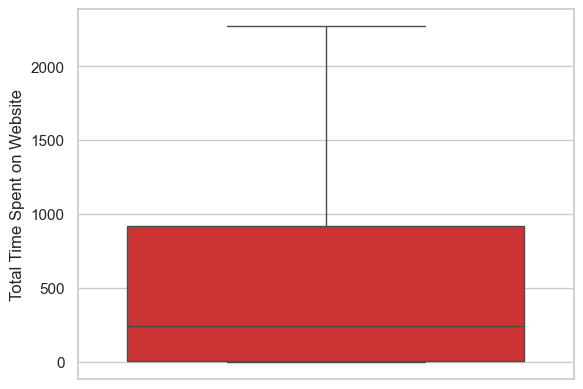

In [1270]:
sns.boxplot(leadscore['Total Time Spent on Website'], orient='vert', palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

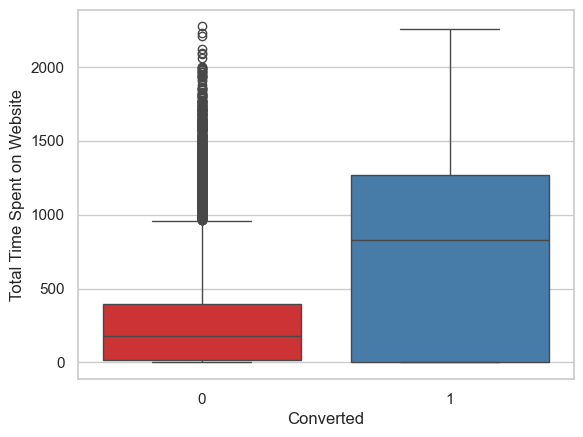

In [1271]:
sns.boxplot(y='Total Time Spent on Website', x='Converted', data = leadscore, palette='Set1')

Inference

Leads who spend more time on the website are more likely to convert. To improve conversions, the website should be made more engaging to encourage longer visits.

#### Page Views Per Visit

In [1274]:
leadscore['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

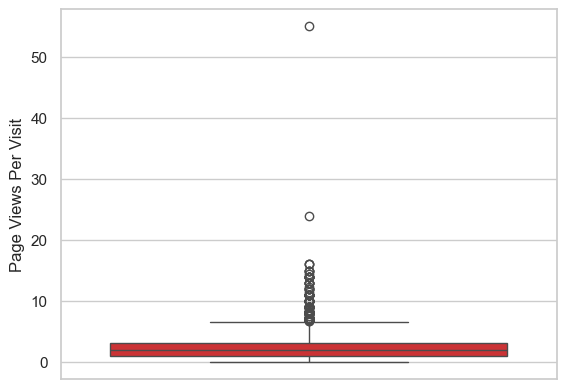

In [1275]:
sns.boxplot(leadscore['Page Views Per Visit'], orient='vert', palette='Set1')

The data contains several outliers, which we will cap at the 95th percentile for analysis.

In [1277]:
percentiles = leadscore['Page Views Per Visit'].quantile([0.05,0.95]).values
leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit'] <= percentiles[0]] =percentiles[0]
leadscore['Page Views Per Visit'][leadscore['Page Views Per Visit'] >= percentiles[1]] =percentiles[1]


<Axes: ylabel='Page Views Per Visit'>

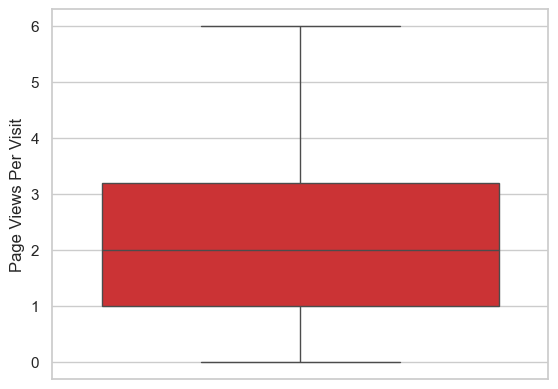

In [1278]:
# Visualizing 

sns.boxplot(leadscore['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

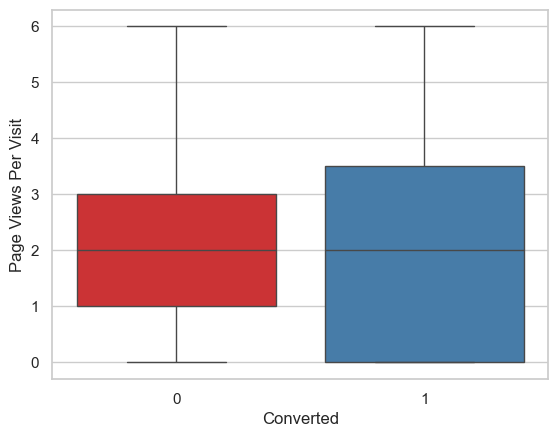

In [1279]:
sns.boxplot(y='Page Views Per Visit', x='Converted', data=leadscore,palette='Set1')

Inference

The median for converted and unconverted leads is the same, meaning Page Views Per Visit does not provide any specific insights for lead conversion.









#### Last Activity

In [1282]:
leadscore['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

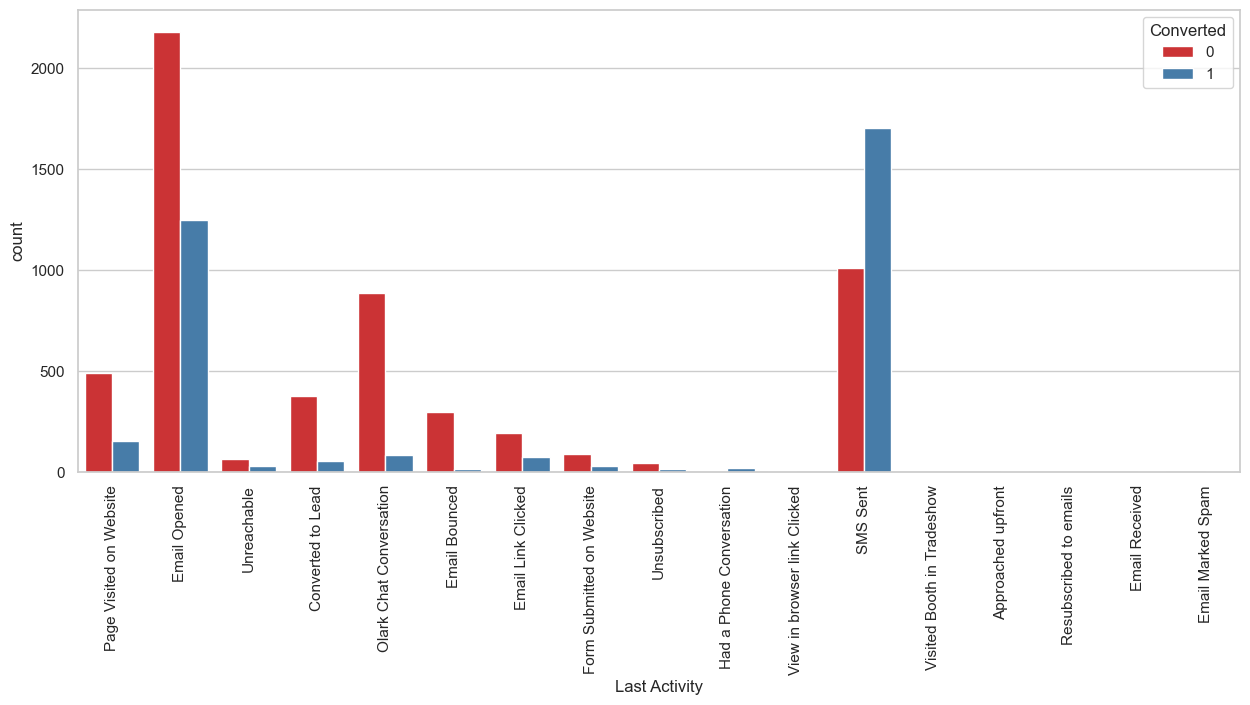

In [1283]:
plt.figure(figsize=(15,6))
sns.countplot(x="Last Activity",hue="Converted",data =leadscore,palette='Set1')
plt.xticks(rotation=90)

In [1284]:
# we can club activities to other_activites which have less data

leadscore['Last Activity'] = leadscore['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked',
                                                                 'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails',
                                                                 'Email Received','Email Marked Spam'],'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

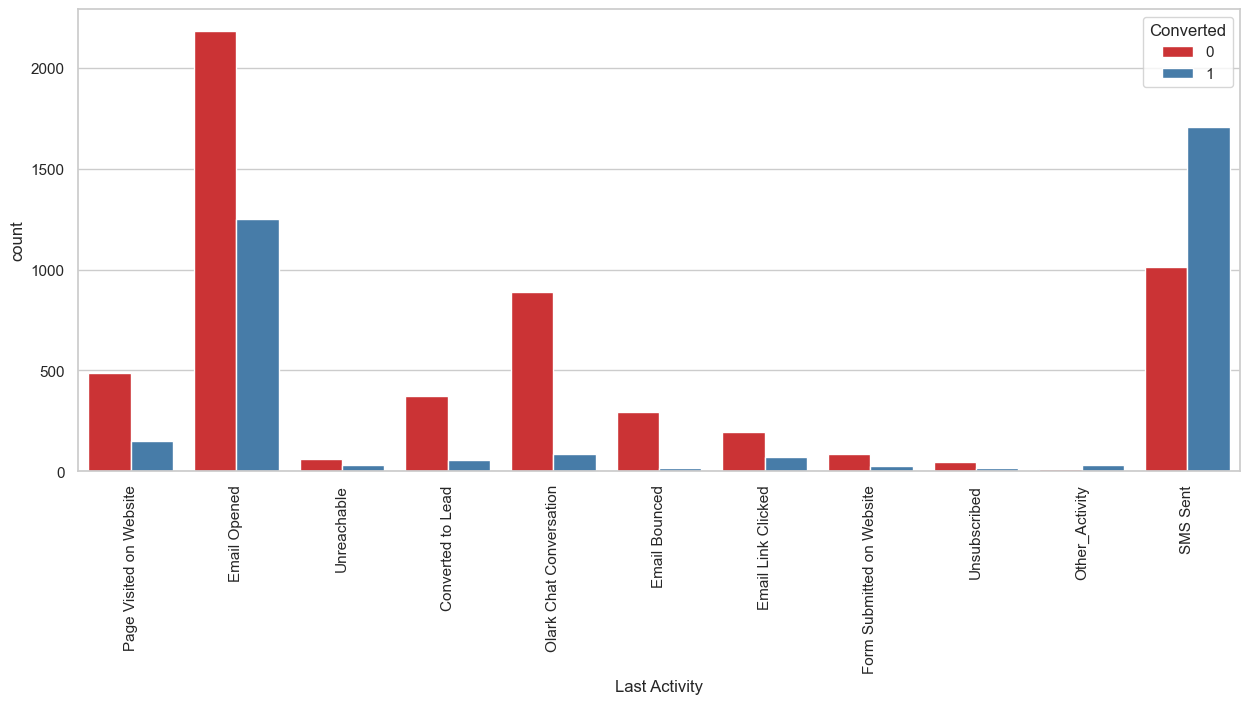

In [1285]:
# Visualizing 

plt.figure(figsize=(15,6))
sns.countplot(x="Last Activity",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference

For most leads, the last recorded activity is Email Opened.
Leads whose last activity was SMS Sent have a conversion rate of nearly 60%.

#### Country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'

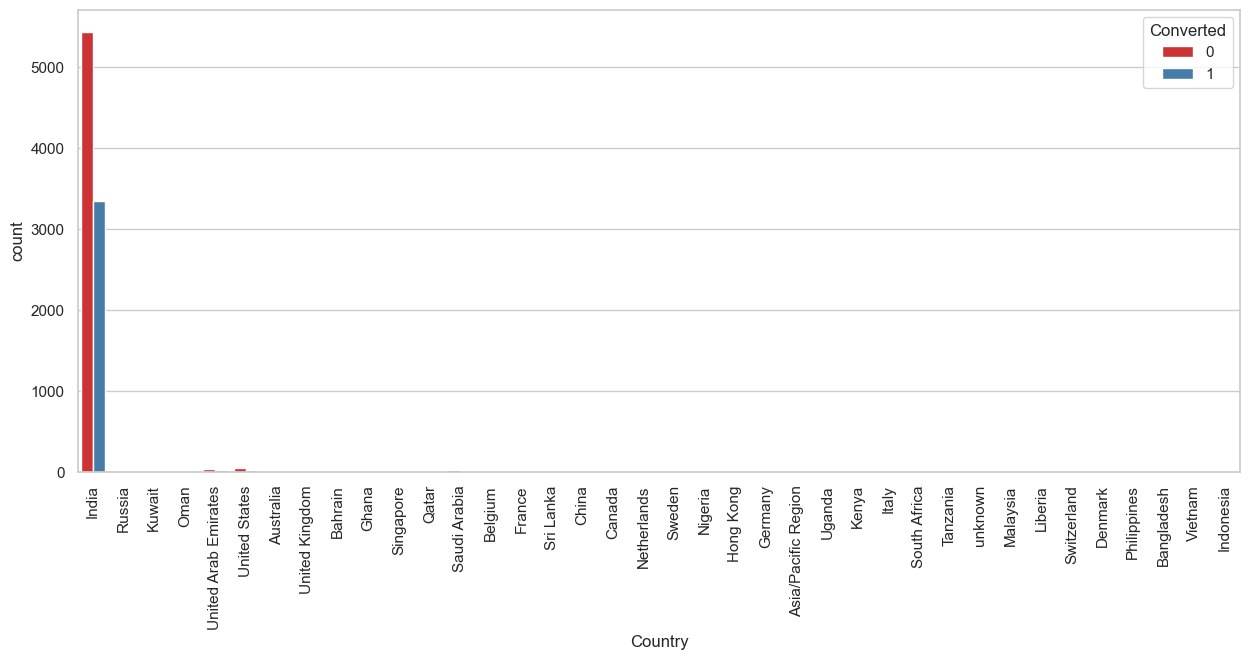

In [1288]:
plt.figure(figsize=(15,6))
sns.countplot(x="Country",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference 

Most values are 'India' no such interference can be drawn

#### Specialization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

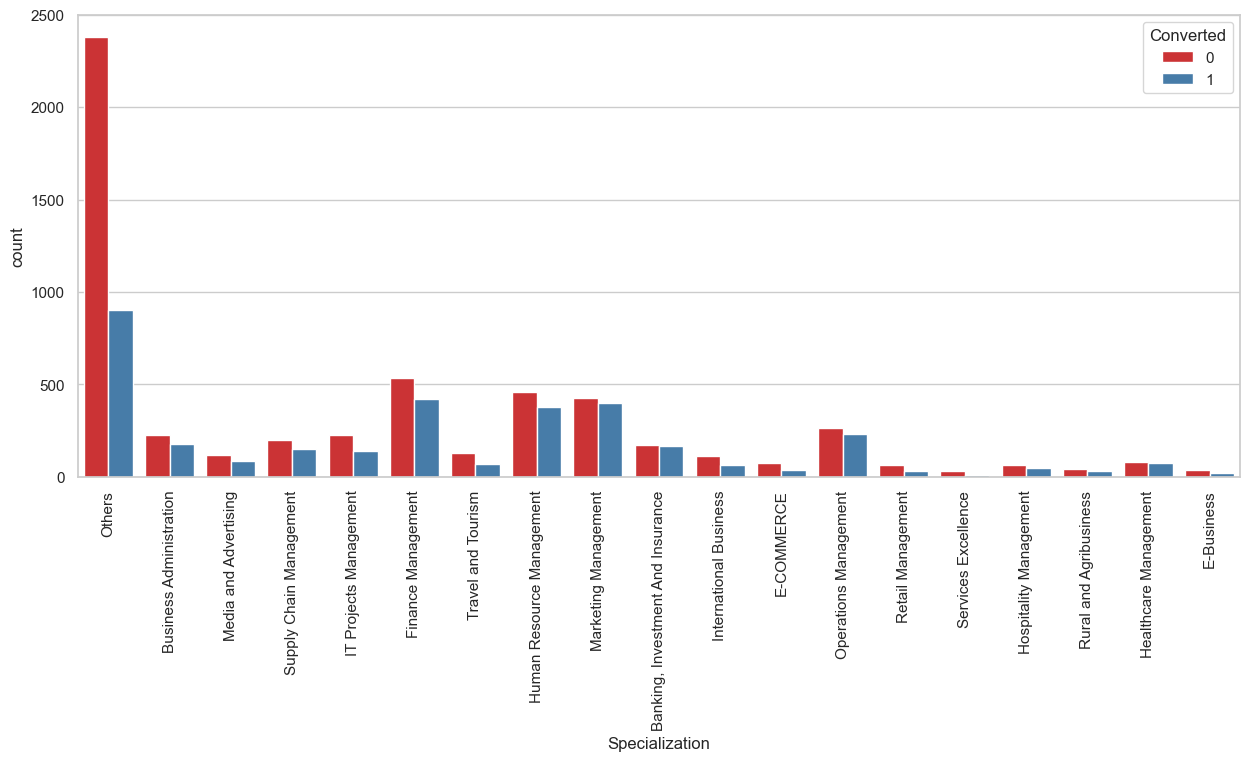

In [1291]:
plt.figure(figsize=(15,6))
sns.countplot(x="Specialization",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference

Focus should be more on the Specialization with high conversion rate.

#### What is your current occupation

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

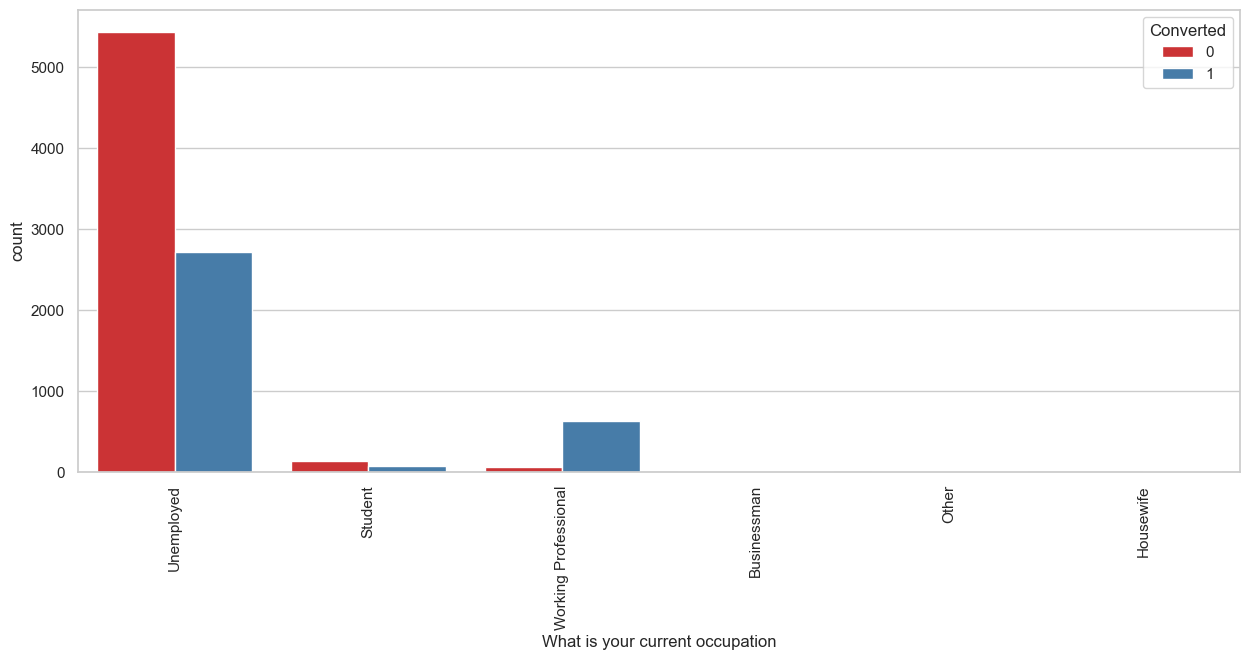

In [1294]:
plt.figure(figsize=(15,6))
sns.countplot(x="What is your current occupation",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference

Working professionals have a higher likelihood of enrolling in the course.
Unemployed leads are the most common but have a conversion rate of around 30-35%.

#### Search

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

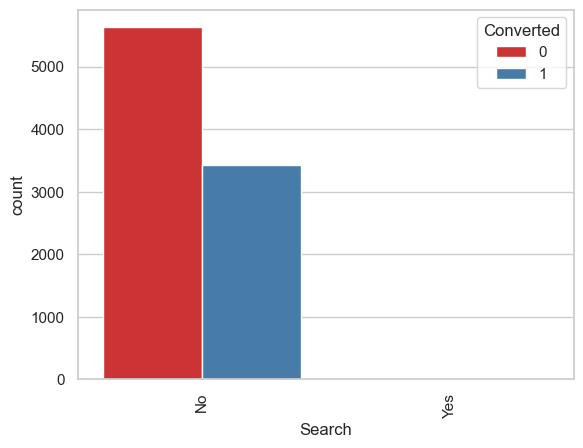

In [1297]:
sns.countplot(x="Search",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference 

Nost entries are 'No', m

#### Magazine

([0], [Text(0, 0, 'No')])

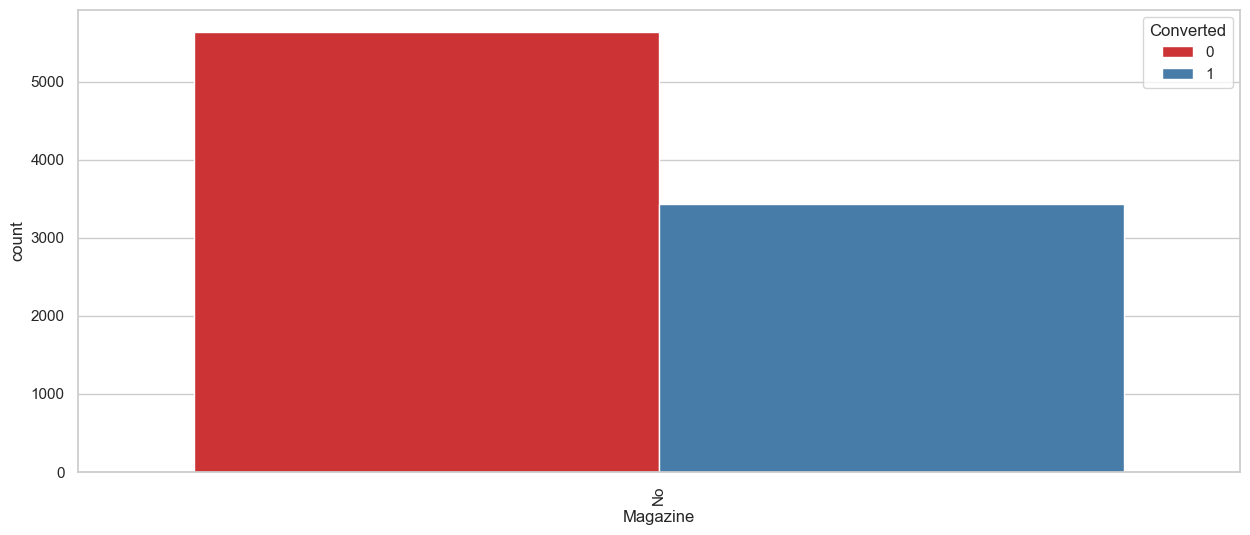

In [1300]:
plt.figure(figsize=(15,6))
sns.countplot(x="Magazine",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Most entries are 'No'

#### NewsPaper Article

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

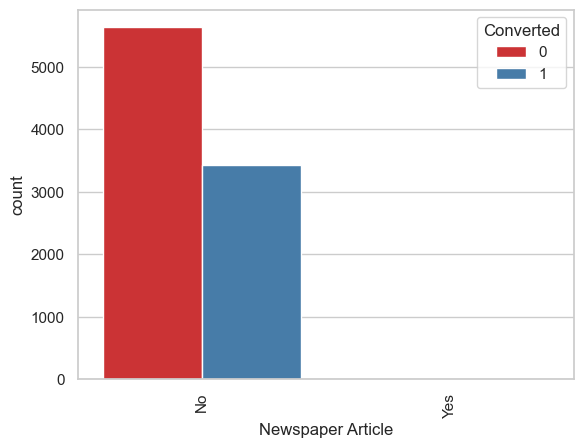

In [1303]:
sns.countplot(x="Newspaper Article",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference 

No - most of entries. no inference can be drawn with thsis parametrers

#### X Education Forums

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

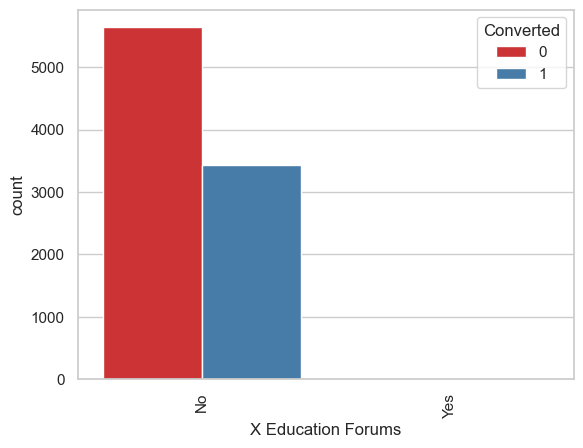

In [1306]:
sns.countplot(x="X Education Forums",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### Newspaper

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

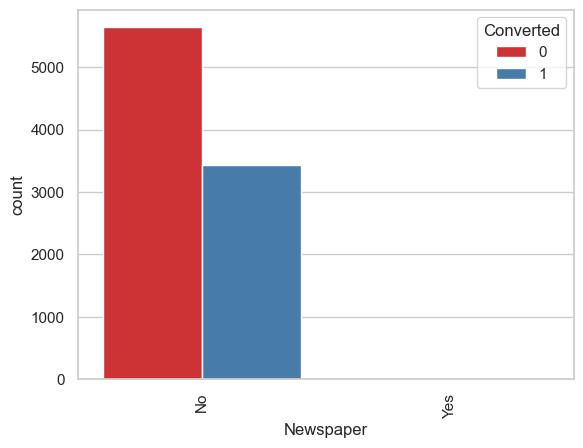

In [1308]:
sns.countplot(x="Newspaper",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### Digital Advertisement

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

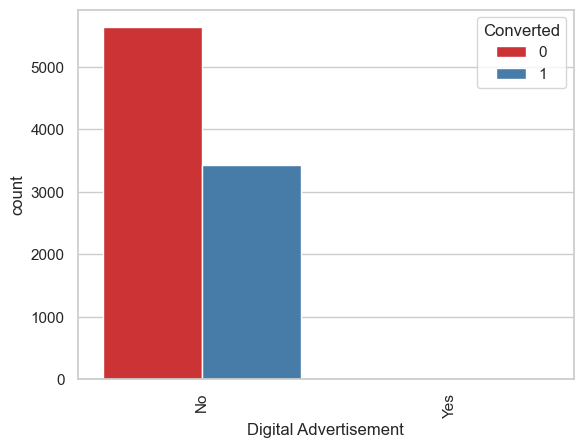

In [1310]:
sns.countplot(x="Digital Advertisement",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### Through Recommendations

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

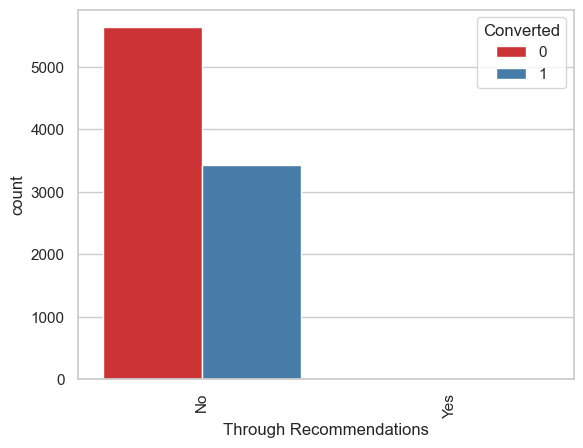

In [1312]:
sns.countplot(x="Through Recommendations",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### REceive More Updates About Our Courses

([0], [Text(0, 0, 'No')])

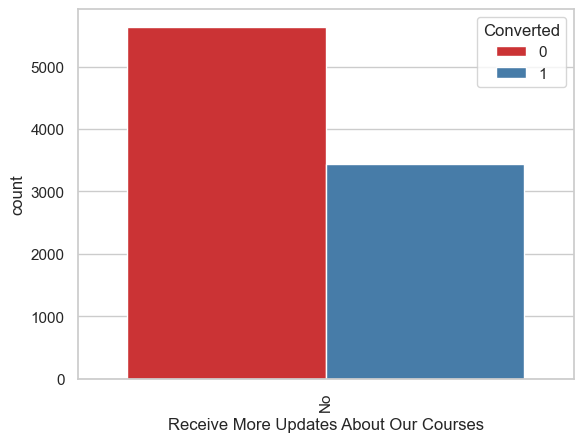

In [1314]:
sns.countplot(x="Receive More Updates About Our Courses",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### TAgs

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0,

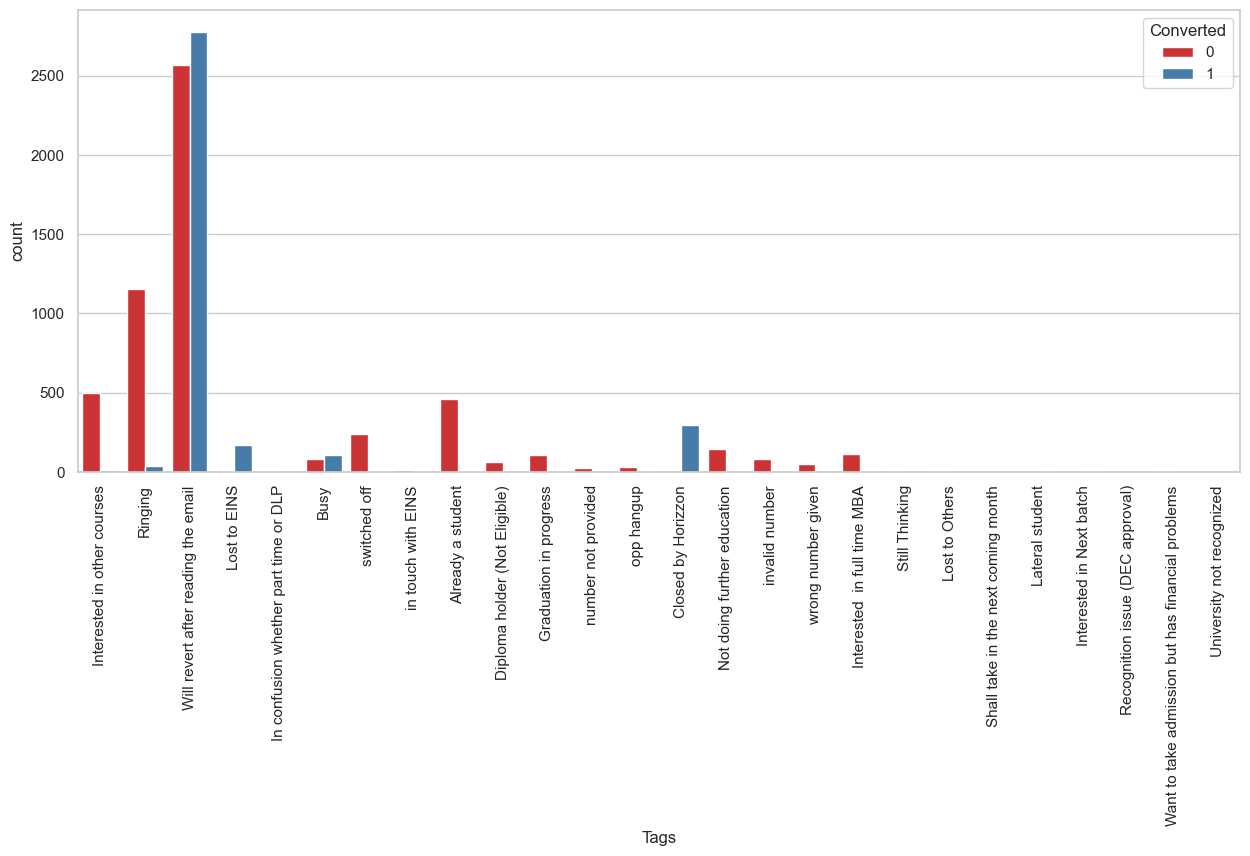

In [1316]:

plt.figure(figsize=(15,6))
sns.countplot(x="Tags",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Inference

This column is generated by the sales team for analysis and is not available for model building. Therefore, we need to remove it before training the model.









#### Update me on Supply Chain Content 



([0], [Text(0, 0, 'No')])

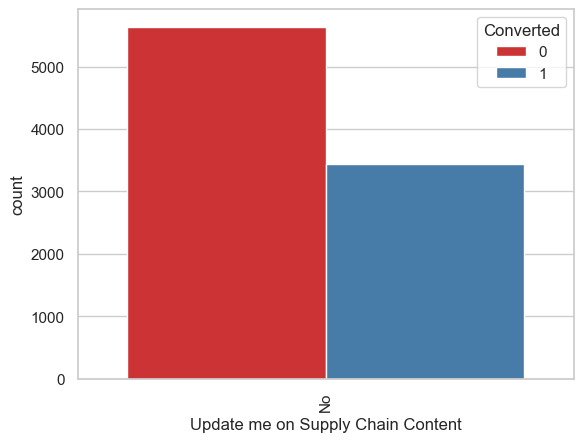

In [1319]:
sns.countplot(x="Update me on Supply Chain Content",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

([0], [Text(0, 0, 'No')])

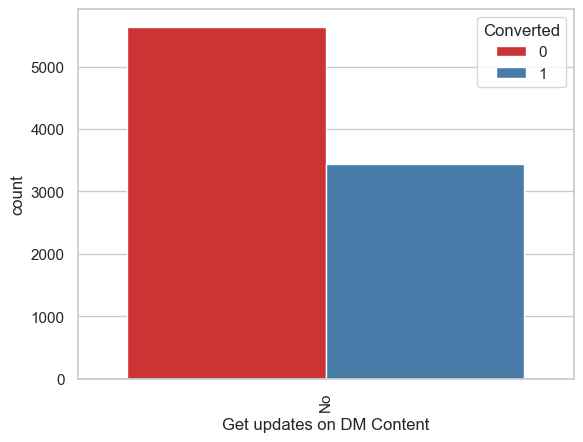

In [1320]:
#### Get Updates on DM content

sns.countplot(x="Get updates on DM Content",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### City

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

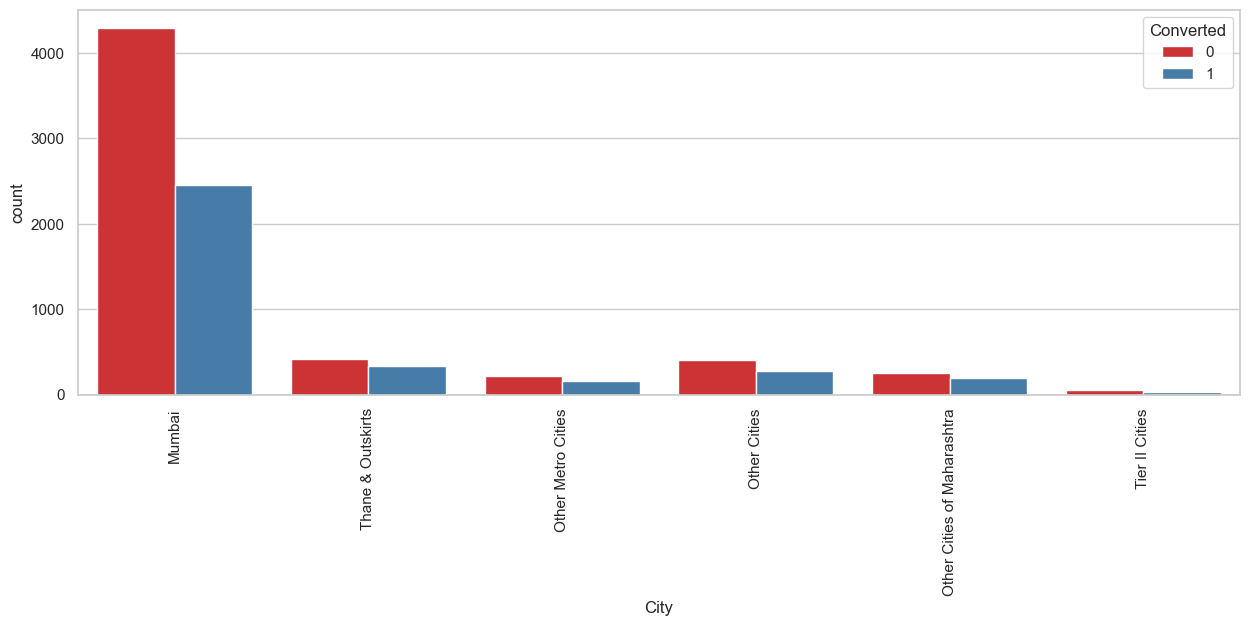

In [1322]:
plt.figure(figsize=(15,5))
sns.countplot(x="City",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Mumbai have more leads with 50 % conversion rate

#### I agree to pay the amount through chequem

([0], [Text(0, 0, 'No')])

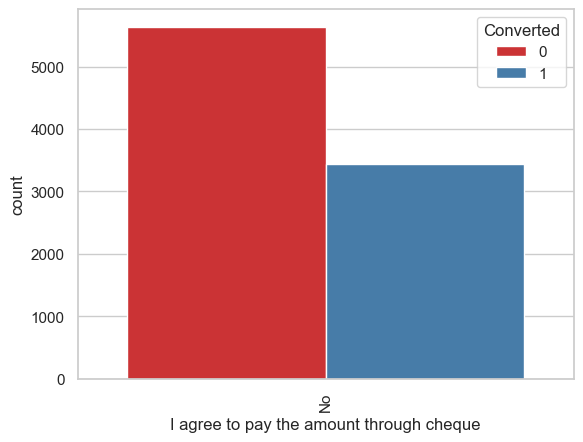

In [1325]:
sns.countplot(x="I agree to pay the amount through cheque",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### A Free Copy Of Mastering The Interview

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

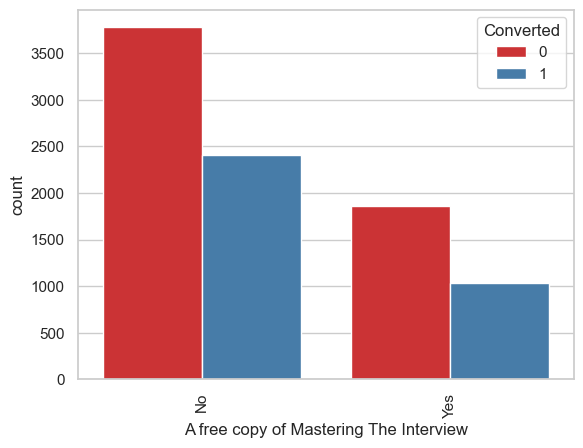

In [1327]:
sns.countplot(x="A free copy of Mastering The Interview",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

#### LAst Notable Activity

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

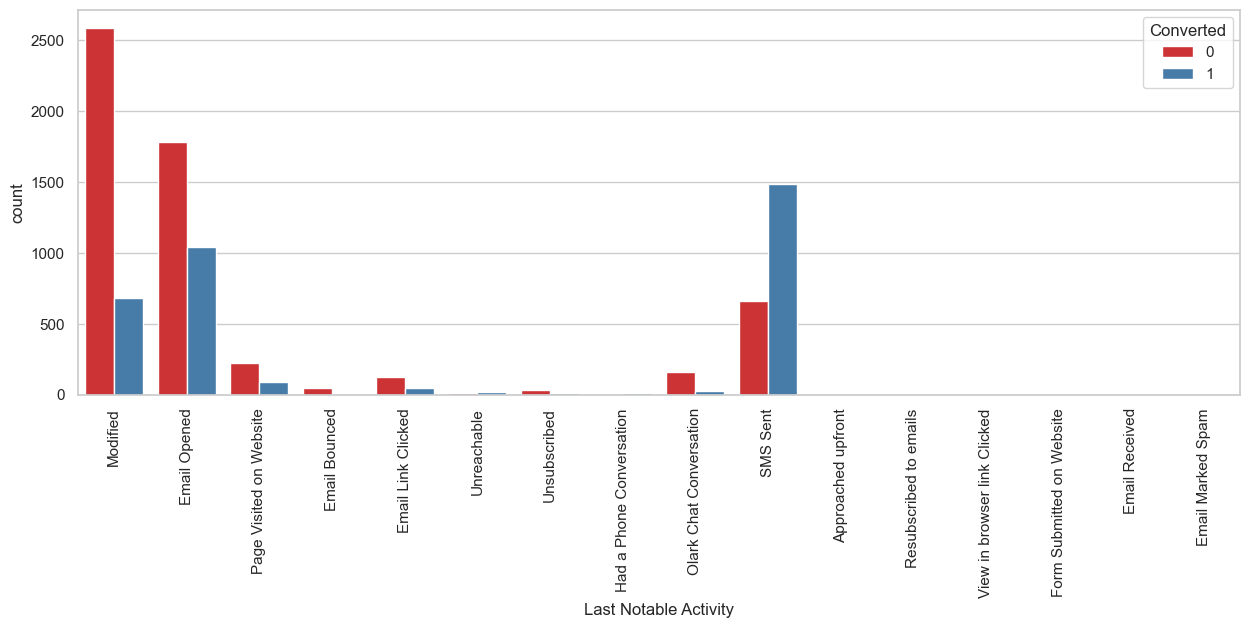

In [1329]:
plt.figure(figsize=(15,5))
sns.countplot(x="Last Notable Activity",hue="Converted", data =leadscore,palette='Set1')
plt.xticks(rotation=90)

Results

Univariate analysis shows that many columns do not contribute useful information to the model. Therefore, we can drop them for further analysis.

In [1331]:
leadscore = leadscore.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

In [1332]:
leadscore.shape

(9074, 14)

In [1333]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

### Data Preparation 

#### Converting some binary variables(Y/N) to 1/0

In [1336]:
var = ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes':1,"No":0})

leadscore[var] = leadscore[var].apply(binary_map)

### Creating Dummy Variables for categorical features

'Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation',
'City','Last Notable Activity'

In [1338]:
# creating dummy variable for categorical variables 

dummy_dt = pd.get_dummies(leadscore[['Lead Origin','Lead Source','Last Activity','Specialization',
                                     'What is your current occupation','City','Last Notable Activity']],drop_first=True).astype(int)
dummy_dt.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1339]:
#Concatenating dummy_data to lead_data 

leadscore = pd.concat([leadscore,dummy_dt],axis=1)
leadscore.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Dropping the columns for which dummies were created

In [1341]:
leadscore = leadscore.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                            'What is your current occupation','City','Last Notable Activity'], axis=1)

In [1342]:
leadscore.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the data into Train-Test-Split

In [1344]:
X = leadscore.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1345]:
#Putting target vvariable to y

y = leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1346]:
# Splitting the data into train & test 

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Scaling the features

In [1348]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1349]:
#checking lead conversion rate

Converted = (sum(leadscore['Converted'])/len(leadscore['Converted'].index))*100
Converted

37.85541106458012

We Have almost 38% Lead Conversion rate

### FEature Selection Using RFE

In [1352]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)  # Correct argument names
rfe = rfe.fit(X_train, y_train)


In [1353]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False, False])

In [1354]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 21),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),


In [1355]:
# viewing columns selected by RFE

cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building 

#### Assessing the model with Stats Model

Model-1

In [1357]:
import statsmodels.api as sm

In [1358]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.6
Date:                Wed, 19 Feb 2025   Deviance:                       5163.2
Time:                        17:46:42   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2957      0.244      1.210      0.226      -0.183       0.775
Do Not Email                                            -1.6977      0.190     -8.919      0.000      -2.071      -1.325
Total Time Spent on Website                              1.1078      0.041     27.173      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1324      0.129     -8.765      0.000      -1.386      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9816      0.478      2.055      0.040       0.045       1.918
Lead Source_Olark Chat                                   1.1267      0.124      9.078      0.000       0.883       1.370
Lead Source_Reference                                    1.8425      0.932      1.977      0.048       0.016       3.669
Lead Source_Welingak Website                             4.4175      1.162      3.802      0.000       2.140       6.695
Last Activity_Olark Chat Conversation                   -1.0574      0.173     -6.108      0.000      -1.397      -0.718
Last Activity_Other_Activity                             1.7530      0.533      3.289      0.001       0.708       2.798
Last Activity_SMS Sent                                   0.7692      0.157      4.908      0.000       0.462       1.076
Last Activity_Unsubscribed                               1.4489      0.480      3.019      0.003       0.508       2.390
Specialization_Others                                   -1.1469      0.126     -9.120      0.000      -1.393      -0.900
What is your current occupation_Housewife               22.2965   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Unemployed              -0.5238      0.217     -2.414      0.016      -0.949      -0.098
What is your current occupation_Working Professional     2.0950      0.286      7.323      0.000       1.534       2.656
Last Notable Activity_Had a Phone Conversation           1.6042      1.222      1.313      0.189      -0.791       3.999
Last Notable Activity_Modified                          -0.6337      0.097     -6.527      0.000      -0.824      -0.443
Last Notable Activity_SMS Sent                           0.7470      0.177      4.211      0.000       0.399       1.095
Last Notable Activity_Unreachable                        1.6470      0.476      3.462      0.001       0.715       2.579
========================================================================================================================
"""

P-value 'What is your current occupation_Housewife' is very high we can drop this column

In [1360]:
#Dropping the column ' What is your current occupation_housewife

col1 = cols.drop('What is your current occupation_Housewife')

#### Model 2

In [1362]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.8
Date:                Wed, 19 Feb 2025   Deviance:                       5169.6
Time:                        17:46:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4049
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3805      0.240      1.586      0.113      -0.090       0.851
Do Not Email                                            -1.7004      0.190     -8.934      0.000      -2.073      -1.327
Total Time Spent on Website                              1.1070      0.041     27.178      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1317      0.129     -8.767      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5404      0.908      1.696      0.090      -0.240       3.321
Lead Origin_Lead Import                                  0.9801      0.478      2.052      0.040       0.044       1.916
Lead Source_Olark Chat                                   1.1243      0.124      9.061      0.000       0.881       1.367
Lead Source_Reference                                    1.8504      0.932      1.986      0.047       0.024       3.677
Lead Source_Welingak Website                             4.4184      1.162      3.803      0.000       2.141       6.696
Last Activity_Olark Chat Conversation                   -1.0588      0.173     -6.115      0.000      -1.398      -0.719
Last Activity_Other_Activity                             1.7546      0.533      3.291      0.001       0.710       2.800
Last Activity_SMS Sent                                   0.7700      0.157      4.913      0.000       0.463       1.077
Last Activity_Unsubscribed                               1.4503      0.480      3.022      0.003       0.510       2.391
Specialization_Others                                   -1.1490      0.126     -9.143      0.000      -1.395      -0.903
What is your current occupation_Unemployed              -0.6061      0.212     -2.858      0.004      -1.022      -0.190
What is your current occupation_Working Professional     2.0118      0.282      7.127      0.000       1.458       2.565
Last Notable Activity_Had a Phone Conversation           1.5992      1.222      1.309      0.191      -0.796       3.994
Last Notable Activity_Modified                          -0.6369      0.097     -6.565      0.000      -0.827      -0.447
Last Notable Activity_SMS Sent                           0.7434      0.177      4.191      0.000       0.396       1.091
Last Notable Activity_Unreachable                        1.6440      0.476      3.455      0.001       0.711       2.577
========================================================================================================================
"""

P-Value for 'LAst Notable Activity_HAd a phone conversation' is very high. we can drop

In [1364]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model-3

In [1366]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Wed, 19 Feb 2025   Deviance:                       5171.6
Time:                        17:46:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3851      0.240      1.605      0.108      -0.085       0.855
Do Not Email                                            -1.7034      0.191     -8.936      0.000      -2.077      -1.330
Total Time Spent on Website                              1.1059      0.041     27.161      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1320      0.129     -8.772      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5400      0.908      1.695      0.090      -0.240       3.320
Lead Origin_Lead Import                                  0.9771      0.478      2.045      0.041       0.041       1.914
Lead Source_Olark Chat                                   1.1214      0.124      9.037      0.000       0.878       1.365
Lead Source_Reference                                    1.8487      0.932      1.984      0.047       0.022       3.675
Lead Source_Welingak Website                             4.4197      1.162      3.804      0.000       2.142       6.697
Last Activity_Olark Chat Conversation                   -1.0516      0.173     -6.075      0.000      -1.391      -0.712
Last Activity_Other_Activity                             2.1650      0.459      4.714      0.000       1.265       3.065
Last Activity_SMS Sent                                   0.7774      0.157      4.962      0.000       0.470       1.085
Last Activity_Unsubscribed                               1.4520      0.480      3.025      0.002       0.511       2.393
Specialization_Others                                   -1.1534      0.126     -9.179      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6051      0.212     -2.852      0.004      -1.021      -0.189
What is your current occupation_Working Professional     2.0084      0.282      7.114      0.000       1.455       2.562
Last Notable Activity_Modified                          -0.6472      0.097     -6.683      0.000      -0.837      -0.457
Last Notable Activity_SMS Sent                           0.7329      0.177      4.135      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6401      0.476      3.447      0.001       0.708       2.573
========================================================================================================================
"""

p-value for 'Lead Origin_Lead Add Form' is very high

In [1368]:
col1 = col1.drop('Lead Origin_Lead Add Form')

### Model 4

In [1370]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.4
Date:                Wed, 19 Feb 2025   Deviance:                       5174.8
Time:                        17:46:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4044
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4017      0.240      1.675      0.094      -0.068       0.872
Do Not Email                                            -1.7052      0.191     -8.945      0.000      -2.079      -1.332
Total Time Spent on Website                              1.1038      0.041     27.153      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1502      0.129     -8.935      0.000      -1.402      -0.898
Lead Origin_Lead Import                                  0.9609      0.478      2.010      0.044       0.024       1.898
Lead Source_Olark Chat                                   1.1144      0.124      9.000      0.000       0.872       1.357
Lead Source_Reference                                    3.3740      0.243     13.878      0.000       2.898       3.851
Lead Source_Welingak Website                             5.9508      0.732      8.133      0.000       4.517       7.385
Last Activity_Olark Chat Conversation                   -1.0563      0.173     -6.104      0.000      -1.396      -0.717
Last Activity_Other_Activity                             2.1606      0.459      4.705      0.000       1.261       3.061
Last Activity_SMS Sent                                   0.7744      0.157      4.944      0.000       0.467       1.081
Last Activity_Unsubscribed                               1.4506      0.480      3.023      0.003       0.510       2.391
Specialization_Others                                   -1.1653      0.126     -9.282      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.6023      0.212     -2.839      0.005      -1.018      -0.186
What is your current occupation_Working Professional     2.0080      0.282      7.111      0.000       1.455       2.561
Last Notable Activity_Modified                          -0.6466      0.097     -6.681      0.000      -0.836      -0.457
Last Notable Activity_SMS Sent                           0.7368      0.177      4.159      0.000       0.390       1.084
Last Notable Activity_Unreachable                        1.6358      0.476      3.438      0.001       0.703       2.568
========================================================================================================================
"""

In [1371]:
# Check for VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.81
15,Last Notable Activity_SMS Sent,6.48
9,Last Activity_SMS Sent,6.26
2,Lead Origin_Landing Page Submission,5.75
11,Specialization_Others,4.00
14,Last Notable Activity_Modified,2.47
4,Lead Source_Olark Chat,2.24
13,What is your current occupation_Working Professional,1.67
7,Last Activity_Olark Chat Conversation,1.63
5,Lead Source_Reference,1.46


In [1372]:
col1 = col1.drop('What is your current occupation_Unemployed')

### Model 5

In [1374]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Wed, 19 Feb 2025   Deviance:                       5182.6
Time:                        17:46:43   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4037
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1714      0.128     -1.336      0.182      -0.423       0.080
Do Not Email                                            -1.7006      0.191     -8.913      0.000      -2.075      -1.327
Total Time Spent on Website                              1.1038      0.041     27.169      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1542      0.129     -8.960      0.000      -1.407      -0.902
Lead Origin_Lead Import                                  0.9417      0.478      1.970      0.049       0.005       1.878
Lead Source_Olark Chat                                   1.1201      0.124      9.045      0.000       0.877       1.363
Lead Source_Reference                                    3.3857      0.243     13.945      0.000       2.910       3.861
Lead Source_Welingak Website                             5.9420      0.732      8.122      0.000       4.508       7.376
Last Activity_Olark Chat Conversation                   -1.0474      0.173     -6.060      0.000      -1.386      -0.709
Last Activity_Other_Activity                             2.1424      0.459      4.663      0.000       1.242       3.043
Last Activity_SMS Sent                                   0.7623      0.156      4.874      0.000       0.456       1.069
Last Activity_Unsubscribed                               1.4243      0.480      2.968      0.003       0.484       2.365
Specialization_Others                                   -1.1772      0.126     -9.362      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.5908      0.194     13.327      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6545      0.097     -6.764      0.000      -0.844      -0.465
Last Notable Activity_SMS Sent                           0.7326      0.177      4.139      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6195      0.474      3.414      0.001       0.690       2.549
========================================================================================================================
"""

In [1375]:
col1 = col1.drop('Lead Origin_Lead Import')	

### Model 6

In [1377]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Wed, 19 Feb 2025   Deviance:                       5186.2
Time:                        17:46:44   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1281      0.127     -1.012      0.312      -0.376       0.120
Do Not Email                                            -1.7017      0.191     -8.922      0.000      -2.076      -1.328
Total Time Spent on Website                              1.0961      0.040     27.161      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1915      0.128     -9.333      0.000      -1.442      -0.941
Lead Source_Olark Chat                                   1.0930      0.123      8.897      0.000       0.852       1.334
Lead Source_Reference                                    3.3495      0.242     13.839      0.000       2.875       3.824
Lead Source_Welingak Website                             5.9157      0.731      8.088      0.000       4.482       7.349
Last Activity_Olark Chat Conversation                   -1.0509      0.173     -6.081      0.000      -1.390      -0.712
Last Activity_Other_Activity                             2.1337      0.459      4.648      0.000       1.234       3.033
Last Activity_SMS Sent                                   0.7691      0.156      4.920      0.000       0.463       1.076
Last Activity_Unsubscribed                               1.4192      0.479      2.961      0.003       0.480       2.359
Specialization_Others                                   -1.1999      0.126     -9.553      0.000      -1.446      -0.954
What is your current occupation_Working Professional     2.5913      0.194     13.336      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6587      0.097     -6.812      0.000      -0.848      -0.469
Last Notable Activity_SMS Sent                           0.7200      0.177      4.072      0.000       0.373       1.066
Last Notable Activity_Unreachable                        1.6073      0.474      3.389      0.001       0.678       2.537
========================================================================================================================
"""

#### Checking for Vif values 

In [1379]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.42
8,Last Activity_SMS Sent,6.25
12,Last Notable Activity_Modified,2.35
10,Specialization_Others,2.21
3,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.79
6,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [1380]:
col1 = col1.drop('Last Notable Activity_SMS Sent', errors='ignore')

In [1381]:
col1 = col1.drop('Last Activity_SMS Sent', errors='ignore')	

#### Model 7 

In [1383]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2762.1
Date:                Wed, 19 Feb 2025   Deviance:                       5524.3
Time:                        17:46:44   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3707
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3253      0.121      2.695      0.007       0.089       0.562
Do Not Email                                            -1.4732      0.181     -8.138      0.000      -1.828      -1.118
Total Time Spent on Website                              1.1089      0.039     28.419      0.000       1.032       1.185
Lead Origin_Landing Page Submission                     -1.0642      0.124     -8.587      0.000      -1.307      -0.821
Lead Source_Olark Chat                                   1.0781      0.118      9.135      0.000       0.847       1.309
Lead Source_Reference                                    3.5549      0.240     14.839      0.000       3.085       4.024
Lead Source_Welingak Website                             6.1024      0.730      8.364      0.000       4.672       7.532
Last Activity_Olark Chat Conversation                   -1.3392      0.169     -7.936      0.000      -1.670      -1.008
Last Activity_Other_Activity                             1.7675      0.464      3.808      0.000       0.858       2.677
Last Activity_Unsubscribed                               0.7051      0.480      1.469      0.142      -0.235       1.646
Specialization_Others                                   -1.0928      0.122     -8.969      0.000      -1.332      -0.854
What is your current occupation_Working Professional     2.5748      0.188     13.676      0.000       2.206       2.944
Last Notable Activity_Modified                          -1.0137      0.079    -12.793      0.000      -1.169      -0.858
Last Notable Activity_Unreachable                        1.0445      0.472      2.215      0.027       0.120       1.969
========================================================================================================================
"""

In [1384]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.03
3,Lead Source_Olark Chat,2.02
11,Last Notable Activity_Modified,1.77
6,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Landing Page Submission,1.41
1,Total Time Spent on Website,1.27
0,Do Not Email,1.21
4,Lead Source_Reference,1.18
10,What is your current occupation_Working Professional,1.17
5,Lead Source_Welingak Website,1.08


In [1385]:
# Dropping the columns 

col1= col1.drop('Last Activity_Unsubscribed')

#### Model 8 

In [1387]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2763.2
Date:                Wed, 19 Feb 2025   Deviance:                       5526.3
Time:                        17:46:44   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3285      0.121      2.722      0.006       0.092       0.565
Do Not Email                                            -1.3912      0.169     -8.230      0.000      -1.722      -1.060
Total Time Spent on Website                              1.1094      0.039     28.436      0.000       1.033       1.186
Lead Origin_Landing Page Submission                     -1.0668      0.124     -8.608      0.000      -1.310      -0.824
Lead Source_Olark Chat                                   1.0784      0.118      9.137      0.000       0.847       1.310
Lead Source_Reference                                    3.5474      0.239     14.829      0.000       3.079       4.016
Lead Source_Welingak Website                             6.0800      0.729      8.346      0.000       4.652       7.508
Last Activity_Olark Chat Conversation                   -1.3395      0.169     -7.938      0.000      -1.670      -1.009
Last Activity_Other_Activity                             1.7649      0.464      3.802      0.000       0.855       2.675
Specialization_Others                                   -1.0941      0.122     -8.982      0.000      -1.333      -0.855
What is your current occupation_Working Professional     2.5746      0.188     13.692      0.000       2.206       2.943
Last Notable Activity_Modified                          -1.0176      0.079    -12.850      0.000      -1.173      -0.862
Last Notable Activity_Unreachable                        1.0415      0.471      2.211      0.027       0.118       1.965
========================================================================================================================
"""

### Checking vif values

In [1389]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.03
3,Lead Source_Olark Chat,2.02
10,Last Notable Activity_Modified,1.77
6,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Landing Page Submission,1.41
1,Total Time Spent on Website,1.27
4,Lead Source_Reference,1.18
9,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.13
5,Lead Source_Welingak Website,1.08


In [1390]:
# Dropping the Last Notable Activity_Unreachable to reduce variables

col1 = col1.drop('Last Notable Activity_Unreachable')

### Model 9

In [1392]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.7
Date:                Wed, 19 Feb 2025   Deviance:                       5531.3
Time:                        17:46:45   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3700
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3412      0.121      2.832      0.005       0.105       0.577
Do Not Email                                            -1.3937      0.169     -8.242      0.000      -1.725      -1.062
Total Time Spent on Website                              1.1073      0.039     28.414      0.000       1.031       1.184
Lead Origin_Landing Page Submission                     -1.0710      0.124     -8.646      0.000      -1.314      -0.828
Lead Source_Olark Chat                                   1.0720      0.118      9.092      0.000       0.841       1.303
Lead Source_Reference                                    3.5391      0.239     14.798      0.000       3.070       4.008
Lead Source_Welingak Website                             6.0721      0.729      8.334      0.000       4.644       7.500
Last Activity_Olark Chat Conversation                   -1.3408      0.169     -7.946      0.000      -1.671      -1.010
Last Activity_Other_Activity                             1.7608      0.464      3.793      0.000       0.851       2.671
Specialization_Others                                   -1.0975      0.122     -9.013      0.000      -1.336      -0.859
What is your current occupation_Working Professional     2.5753      0.188     13.701      0.000       2.207       2.944
Last Notable Activity_Modified                          -1.0245      0.079    -12.951      0.000      -1.179      -0.869
========================================================================================================================
"""

### Checking for vif values

In [1394]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Others,2.03
3,Lead Source_Olark Chat,2.02
10,Last Notable Activity_Modified,1.77
6,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Landing Page Submission,1.40
1,Total Time Spent on Website,1.27
4,Lead Source_Reference,1.18
9,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.13
5,Lead Source_Welingak Website,1.08


we habe 11 variables in our final model. P values of all variables is 0 & VIF values are low 
for all variables. model 9 is final model

### Making Predicition on Train Set

In [1397]:
# Getting predicited values on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.287568
1012    0.223793
9226    0.155411
4750    0.748356
7987    0.617715
1281    0.570855
2880    0.153728
4971    0.920516
7536    0.909272
1248    0.575203
dtype: float64

In [1398]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28756786, 0.22379251, 0.15541117, 0.74835637, 0.61771537,
       0.57085499, 0.15372801, 0.92051604, 0.9092721 , 0.57520276])

In [1399]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.287568,3009
1,0,0.223793,1012
2,0,0.155411,9226
3,1,0.748356,4750
4,1,0.617715,7987


Setting a cut-off probability of 0.5 to determine predicted labels.
Creating a new column 'predicted', where 1 is assigned if Converted_Prob > 0.5, otherwise 0.

In [1401]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)

In [1402]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.287568,3009,0
1,0,0.223793,1012,0
2,0,0.155411,9226,0
3,1,0.748356,4750,1
4,1,0.617715,7987,1


### Making confusion Matrix 

In [1404]:
#Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3457  448]
 [ 803 1643]]


In [1405]:
# Let's check overall accuracy 

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8030231459612659


### Metrics beyond simply accuracy

In [1407]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false postives
FN = confusion[1,0] # false negatives

In [1408]:
# Sensitivity of our Logistic regressional model

print("Sensitivity : ",TP/float(TP+FN))

Sensitivity :  0.6717089125102208


In [1409]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8852752880921895


In [1410]:
# Calculating false positive rate - predicting converted lead when 
print("False Positive Rate :",FP/float(TN+FP))

False Positive Rate : 0.1147247119078105


In [1411]:
#Positive predictive value

print("Positive PRedictive Value :",TP/float(TP+FP))

Positive PRedictive Value : 0.7857484457197513


In [1412]:
# Negative predictive value

print("Negative predictive value :",TN/float(TN+FN))

Negative predictive value : 0.8115023474178403


We observed that our specificity was high (~88%), but our sensitivity was only 70%, which needed improvement.
This lower sensitivity was primarily due to the arbitrary cut-off point of 0.5.
To achieve a balanced sensitivity and specificity, we need to optimize the cut-off using the ROC curve.

### Plotting the ROC Curve

The ROC curve illustrates several key points:

It highlights the tradeoff between sensitivity and specificity—an increase in sensitivity results in a decrease in specificity.
The closer the curve is to the left-hand and top borders, the more accurate the model.
If the curve is closer to the 45-degree diagonal, the model is less accurate.

In [1415]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1416]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate=False)

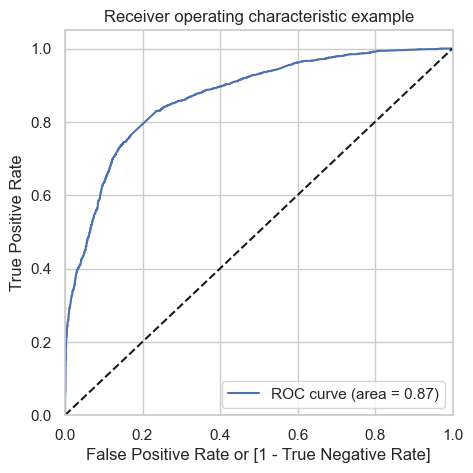

In [1417]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

WE have higher(0.87) area under ROC curve therefor our model is good 

### Finding the Optimal Cutoff Point

Previously, we used an arbitrary cut-off value of 0.5. Now, we need to determine the best cut-off value that provides a balance between sensitivity and specificity. The following section focuses on identifying this optimal probability.

In [1420]:
#Let's create columns with different probability cutoffs

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x> i else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.287568,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.223793,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.155411,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.748356,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.617715,7987,1,1,1,1,1,1,1,1,0,0,0


In [1421]:
# Now let's ca;culate accuracy sensitivity and specificity for various prob cutoff

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

numb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numb:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [ i,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.575815  0.973017  0.327017
0.2   0.2  0.703354  0.902698  0.578489
0.3   0.3  0.779405  0.841783  0.740333
0.4   0.4  0.809321  0.733034  0.857106
0.5   0.5  0.803023  0.671709  0.885275
0.6   0.6  0.786963  0.587490  0.911908
0.7   0.7  0.763659  0.479150  0.941869
0.8   0.8  0.741143  0.369992  0.973624
0.9   0.9  0.706031  0.247343  0.993342


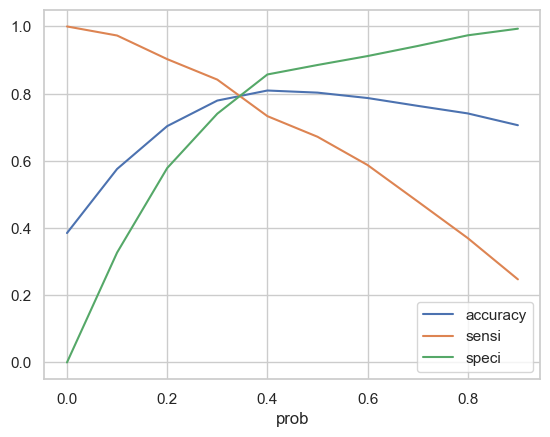

In [1422]:
# let's plot accuracysensitivity & specificityfor various propb

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.35 is optimum point to take it as cutoff probability

In [1652]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x> 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.287568,3009,0,1,1,1,0,0,0,0,0,0,0,0,29
1,0,0.223793,1012,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.155411,9226,0,1,1,0,0,0,0,0,0,0,0,0,16
3,1,0.748356,4750,1,1,1,1,1,1,1,1,1,0,0,1,75
4,1,0.617715,7987,1,1,1,1,1,1,1,1,0,0,0,1,62


Assigning LEad Score to TRaining DAta

In [1426]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.287568,3009,0,1,1,1,0,0,0,0,0,0,0,0,29
1,0,0.223793,1012,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.155411,9226,0,1,1,0,0,0,0,0,0,0,0,0,16
3,1,0.748356,4750,1,1,1,1,1,1,1,1,1,0,0,1,75
4,1,0.617715,7987,1,1,1,1,1,1,1,1,0,0,0,1,62


### Model Evaluation 

In [1654]:
# Let's check overall accuracy 

print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8047551566682413


In [1429]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3242,  663],
       [ 577, 1869]], dtype=int64)

In [1430]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false postives
FN = confusion[1,0] # false negatives

In [1656]:
# Let's see sensitivity 

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6717089125102208


In [1658]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8852752880921895


In [1433]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.1147247119078105


In [1434]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7857484457197513


In [1435]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8115023474178403


### Precision and Recall 

In [1437]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3457,  448],
       [ 803, 1643]], dtype=int64)

In [1670]:
# Precision
TP / TP + FP

print("Precision  : ",precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision  :  0.7412


In [1668]:
# Recall
TP / TP + FN

print("Recall  : ",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall  :  0.7575633687653311


### Precision and Recall  trade off

In [1443]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [1444]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

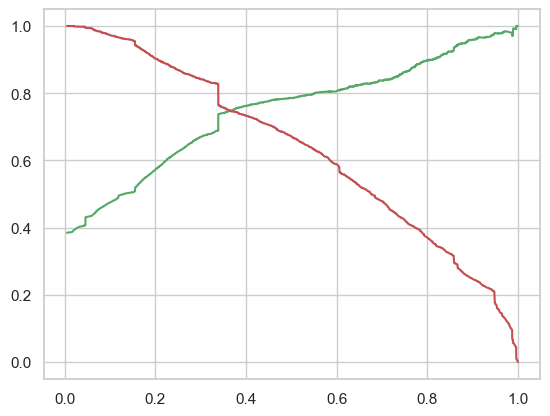

In [1445]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### MAking predictions on test set 

##### Scaling test data

In [1447]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
                                                                                                        

In [1448]:
## Assigning columns 

X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0


In [1449]:
# Adding a const 
X_test_sm = sm.add_constant(X_test)

#MAking predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.194455
1490    0.980835
7936    0.169392
4216    0.866672
3830    0.200913
1800    0.734168
6507    0.189740
4821    0.418676
4223    0.858000
4714    0.155411
dtype: float64

In [1450]:
# Converting y_test_pred to dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [1451]:
#Checking head

y_pred_1.head()

,0
3271,0.194455
1490,0.980835
7936,0.169392
4216,0.866672
3830,0.200913


In [1452]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1453]:
#Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [1454]:
# Removing index for both dataFrames to append

y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1455]:
# Appending y_test_df & y_pred_1

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [1456]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.194455
1,1,1490,0.980835
2,0,7936,0.169392
3,1,4216,0.866672
4,0,3830,0.200913


In [1457]:
# Renaming he column
y_pred_final = y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1458]:
#Rearranging the columns

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [1459]:
# Let's see head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.194455
1,1490,1,0.980835
2,7936,0,0.169392
3,4216,1,0.866672
4,3830,0,0.200913


In [1460]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1if x>0.34 else 0)

In [1461]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.194455,0
1,1490,1,0.980835,1
2,7936,0,0.169392,0
3,4216,1,0.866672,1
4,3830,0,0.200913,0


In [1674]:
# Let's check overall accuracy 

print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))


Accuracy : 0.8068307014322439


In [1463]:
# making confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1444,  290],
       [ 236,  753]], dtype=int64)

In [1464]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false postives
FN = confusion[1,0] # false negatives

In [1676]:
# Let's see sensitivity

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6717089125102208


In [1466]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8852752880921895


In [1678]:
#Precision =TP/TP+FP
print("Precision  : ",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision  :  0.7219558964525408


In [1680]:
#Recall = TP / TP + FN
print("Recall  : ",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall  :  0.7613751263902933


In [1467]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.194455,0,19
1,1490,1,0.980835,1,98
2,7936,0,0.169392,0,17
3,4216,1,0.866672,1,87
4,3830,0,0.200913,0,20


In [1642]:
# Precision = TP / TP + FP
print("Precision  : ",precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision  :  0.7219558964525408


In [1644]:
#Recall = TP / TP + FN
print("Recall  : ",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall  :  0.7613751263902933


### Results 

1)comparing the values obtained for Train & Test

### Train Data:

## Results :
### 1) Comparing the values obtained for Train & Test:

## Train Data:

#### -Accuracy :     80.4 %
#### -Sensitivity :  67   %
#### -Specificity :  88.5 %
#### -Precision   :  74.2 %
#### -Recall      :  75  %

### Test Data:

#### -Accuracy :     80.6 %
#### -Sensitivity :  67  %
#### -Specificity :  88%
#### -Precision   :  72 %
#### -Recall      :  76 %

#### We have successfully achieved our goal of estimating the target lead conversion rate at around 80%. The model performs well in predicting conversions, providing the CEO with confidence to make informed decisions and improve the lead conversion rate to 80%.

### 2)Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [1692]:
hot_leadscore=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leadscore

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.980835,1,98
3,4216,1,0.866672,1,87
8,4223,1,0.858000,1,86
21,2461,1,0.987027,1,99
23,5822,1,0.995813,1,100
...,...,...,...,...,...
2679,4766,1,0.892628,1,89
2684,8343,0,0.929943,1,93
2686,8052,1,0.995813,1,100
2694,1566,1,0.967160,1,97


### There are 368 leads that can be contacted and have a high likelihood of conversion. The Prospect IDs of these potential customers are

In [1695]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leadscore["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 2461, 5822, 2684, 4959, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 7674, 8596,  446,  789, 8372, 5805,
        337, 1561,  737, 2176, 6423, 7174, 1436, 7552, 3932, 1475, 5785,
       2860, 7253, 4297,  200, 5490, 1995,  999, 1997, 5797,  831, 7653,
        572, 4149,   76, 2018,  243, 6743, 7695, 1051, 1663, 6598, 3288,
       8959, 7521, 8282, 8213, 9063, 5292, 6913, 6015, 1481,  785, 2985,
       3265, 3285, 7433, 2460, 3858, 3810, 2009, 8106, 8207,  373, 4179,
       8076, 8568, 5141, 6784, 6754, 2960, 1667, 7753, 3983,  802, 8745,
        505, 8509, 6094, 7036, 2680,  112, 6149, 7157, 7175, 1675, 6999,
       5826, 8492, 3628, 2481, 3439, 4612, 7129, 4793, 3227, 2121, 4837,
       2495,  822, 8111, 7952, 2378, 7699, 5638, 2342, 8077, 2727, 2961,
       1542, 5656, 2630, 8205, 6332, 4922, 8461, 7202, 5087,  174, 2674,
       8065, 2095, 1568, 8597, 3535, 4708, 6066, 6538, 5700, 1388, 5815,
       7970, 7902, 5804, 4081, 5440, 1927, 5824,   

### 3) Finding out the Important Features from our final model:

In [1698]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.072139
Lead Source_Reference                                   3.539059
What is your current occupation_Working Professional    2.575254
Last Activity_Other_Activity                            1.760769
Total Time Spent on Website                             1.107306
Lead Source_Olark Chat                                  1.071962
const                                                   0.341248
Last Notable Activity_Modified                         -1.024455
Lead Origin_Landing Page Submission                    -1.071023
Specialization_Others                                  -1.097522
Last Activity_Olark Chat Conversation                  -1.340751
Do Not Email                                           -1.393659
dtype: float64